# Question 1

## What is the most booked neighbourhood in Paris ?

### Introduction





This notebook contains the analysis performed to solve our first question about the **most booked neighbourhood** in **Paris** in **June** 2022.
The data was collected from [**Inside Airbnb** website](http://insideairbnb.com/get-the-data/).
Check this section to get the [**listings**](http://data.insideairbnb.com/france/ile-de-france/paris/2022-06-06/data/listings.csv.gz) data, the [**calendar**](http://data.insideairbnb.com/france/ile-de-france/paris/2022-06-06/data/calendar.csv.gz) and also the [**reviews**](http://data.insideairbnb.com/france/ile-de-france/paris/2022-06-06/data/reviews.csv.gz) data provided in **Paris, Île-de-France, France** section.
This data will be used to answer the questions and complete this analysis about **Paris-Airbnb-data**.





In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Reading the data files
listings = pd.read_csv('data/paris-airbnb/listings.csv')
calendar = pd.read_csv('data/paris-airbnb/calendar.csv')

In [3]:
# Looking into the dataframes
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,26660141,https://www.airbnb.com/rooms/26660141,20220606014139,2022-06-07,"CHARMANT APPARTEMENT, 50M2 AUX PORTES DE PARIS","Charmant appartement avec petit balcon filant,...",La rue principale à la sortie du métro est trè...,https://a0.muscache.com/pictures/a776b332-0fde...,200407698,https://www.airbnb.com/users/show/200407698,...,5.00,4.88,4.94,NaN,f,1,1,0,0,0.38
1,25177338,https://www.airbnb.com/rooms/25177338,20220606014139,2022-06-07,Cosy and quiet appartement at Les Lilas,<b>The space</b><br />Le logement est situé da...,NaN,https://a0.muscache.com/pictures/e984c1e4-6d40...,185793394,https://www.airbnb.com/users/show/185793394,...,4.56,4.50,4.56,NaN,t,1,1,0,0,0.35
2,25218084,https://www.airbnb.com/rooms/25218084,20220606014139,2022-06-07,paris avec une maison,une maison restaurée et faite à notre image ap...,Être dans un véritable maison avec un parc à q...,https://a0.muscache.com/pictures/dbfc69a1-76cb...,190542280,https://www.airbnb.com/users/show/190542280,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.05
3,23135649,https://www.airbnb.com/rooms/23135649,20220606014139,2022-06-07,"Charming studio, Pont de Neuilly - Paris",Studio apartment in the heart of the prestigio...,The Saint James district of Neuilly sur Seine ...,https://a0.muscache.com/pictures/58399f3d-c271...,171938056,https://www.airbnb.com/users/show/171938056,...,4.94,4.87,4.61,NaN,f,1,0,1,0,0.65
4,23259887,https://www.airbnb.com/rooms/23259887,20220606014139,2022-06-07,A cosy appartement,Situé dans un quartier agréable proche de Chât...,NaN,https://a0.muscache.com/pictures/ad0ade9c-89d5...,20135501,https://www.airbnb.com/users/show/20135501,...,4.86,4.91,4.65,NaN,t,1,1,0,0,0.87


In [4]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,26660141,2022-06-07,f,$90.00,$90.00,5.0,8.0
1,26660141,2022-06-08,f,$90.00,$90.00,5.0,8.0
2,26660141,2022-06-09,f,$90.00,$90.00,5.0,8.0
3,26660141,2022-06-10,f,$90.00,$90.00,5.0,8.0
4,26660141,2022-06-11,f,$90.00,$90.00,5.0,8.0


In [5]:
# Calculating the shapes of dataframes

print('The shape of listings dataframe is:',listings.shape)
print('The shape of calendar dataframe is:',calendar.shape)

The shape of listings dataframe is: (56739, 74)
The shape of calendar dataframe is: (20707929, 7)


In [6]:
# Viewing some descriptive statistics about the numerical values of listings dataframe
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.673900e+04,5.673900e+04,5.673900e+04,56727.000000,56727.000000,0.0,56739.000000,56739.000000,56739.000000,0.0,...,44684.000000,44673.000000,44681.000000,44670.000000,44668.000000,56739.000000,56739.000000,56739.000000,56739.000000,45281.000000
mean,6.935639e+16,2.022061e+13,1.128384e+08,12.481041,12.481041,NaN,48.863462,2.343554,3.060135,NaN,...,4.593612,4.793961,4.804103,4.789998,4.608434,10.025045,9.264915,0.538836,0.034826,0.980303
std,1.922281e+17,2.722680e+01,1.360755e+08,83.879858,83.879858,NaN,0.020537,0.040348,1.666769,NaN,...,0.523597,0.402834,0.401047,0.353174,0.467024,31.835610,31.685771,3.410858,0.672199,1.541610
min,5.396000e+03,2.022061e+13,2.626000e+03,0.000000,0.000000,NaN,48.803750,2.206290,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.369082e+07,2.022061e+13,1.463397e+07,1.000000,1.000000,NaN,48.849310,2.319836,2.000000,NaN,...,4.440000,4.750000,4.780000,4.730000,4.500000,1.000000,1.000000,0.000000,0.000000,0.140000
50%,3.092530e+07,2.022061e+13,4.425650e+07,1.000000,1.000000,NaN,48.865160,2.347200,2.000000,NaN,...,4.750000,4.920000,4.940000,4.900000,4.710000,1.000000,1.000000,0.000000,0.000000,0.460000
75%,4.716712e+07,2.022061e+13,1.767666e+08,2.000000,2.000000,NaN,48.879630,2.370911,4.000000,NaN,...,4.960000,5.000000,5.000000,5.000000,4.890000,2.000000,1.000000,0.000000,0.000000,1.220000
max,6.421428e+17,2.022061e+13,4.625783e+08,1246.000000,1246.000000,NaN,48.913920,2.487250,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,233.000000,233.000000,75.000000,26.000000,85.170000



We can notice for the moment that **neighbourhood_group_cleansed** and **bathrooms** are the columns with the most missing values. We can confirm that by taking a look into the number of missing values per column.


In [7]:
# View the count of missing values of listings dataframe

listings.isnull().sum().sort_values()

id                                  0
availability_30                     0
number_of_reviews                   0
neighbourhood_cleansed              0
calendar_last_scraped               0
                                ...  
license                         24724
host_about                      29151
calendar_updated                56739
neighbourhood_group_cleansed    56739
bathrooms                       56739
Length: 74, dtype: int64

We can also notice that the **calendar_updated** column is full of missing values.

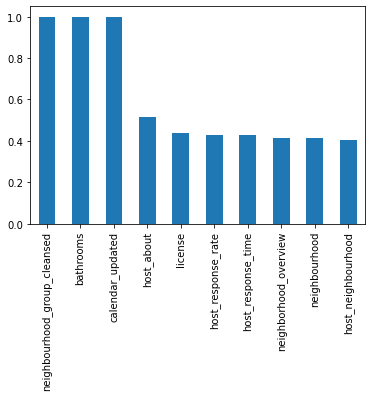

In [8]:
# Plot the ratio of missing values with the number of values for the listings dataframe

(listings.isnull().sum()/listings.shape[0]).sort_values(ascending=False)[:10].plot(kind='bar');



This plot shows the top 10 columns with missing values, we can see that **neighbourhood_group_cleansed**, **bathrooms** and **calendar_updated** come first with 100 % of missing values rate compared to the whole values.

In [9]:
# Viewing some descriptive statistics about the numerical values of calendar dataframe
calendar.describe()

,listing_id,minimum_nights,maximum_nights
count,2.070793e+07,2.070756e+07,2.070756e+07
mean,6.936259e+16,8.954375e+01,4.780960e+05
std,1.922339e+17,1.602215e+02,3.200689e+07
min,5.396000e+03,1.000000e+00,1.000000e+00
25%,1.368675e+07,2.000000e+00,3.000000e+02
50%,3.092166e+07,3.000000e+00,1.125000e+03
75%,4.716802e+07,3.000000e+01,1.125000e+03
max,6.421428e+17,9.999000e+03,2.147484e+09



We can notice that **maxiumum_nights** is the column with the biggest variations of values.


In [10]:
# View the count of missing values of calendar dataframe
calendar.isnull().sum()


listing_id          0
date                0
available           0
price             173
adjusted_price    173
minimum_nights    366
maximum_nights    366
dtype: int64

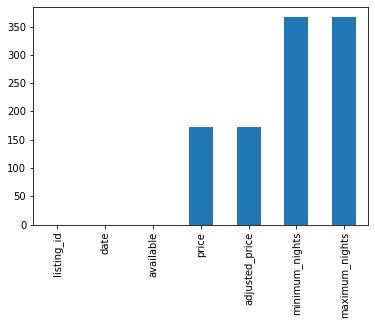

In [11]:
# Plot the number of missing values with the number of values for the calendar dataframe
(calendar.isnull().sum()).plot(kind='bar');



We can conclude from the previous figure that there's a small number of missing values in **calendar** dataframe compared to the whole size of the dataframe.

In [12]:
# Drop the duplicates and columns that are fully missing from the listings dataframe
listings = listings.drop_duplicates()
listings = listings.dropna(axis=1,how='all')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,26660141,https://www.airbnb.com/rooms/26660141,20220606014139,2022-06-07,"CHARMANT APPARTEMENT, 50M2 AUX PORTES DE PARIS","Charmant appartement avec petit balcon filant,...",La rue principale à la sortie du métro est trè...,https://a0.muscache.com/pictures/a776b332-0fde...,200407698,https://www.airbnb.com/users/show/200407698,...,5.00,4.88,4.94,NaN,f,1,1,0,0,0.38
1,25177338,https://www.airbnb.com/rooms/25177338,20220606014139,2022-06-07,Cosy and quiet appartement at Les Lilas,<b>The space</b><br />Le logement est situé da...,NaN,https://a0.muscache.com/pictures/e984c1e4-6d40...,185793394,https://www.airbnb.com/users/show/185793394,...,4.56,4.50,4.56,NaN,t,1,1,0,0,0.35
2,25218084,https://www.airbnb.com/rooms/25218084,20220606014139,2022-06-07,paris avec une maison,une maison restaurée et faite à notre image ap...,Être dans un véritable maison avec un parc à q...,https://a0.muscache.com/pictures/dbfc69a1-76cb...,190542280,https://www.airbnb.com/users/show/190542280,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.05
3,23135649,https://www.airbnb.com/rooms/23135649,20220606014139,2022-06-07,"Charming studio, Pont de Neuilly - Paris",Studio apartment in the heart of the prestigio...,The Saint James district of Neuilly sur Seine ...,https://a0.muscache.com/pictures/58399f3d-c271...,171938056,https://www.airbnb.com/users/show/171938056,...,4.94,4.87,4.61,NaN,f,1,0,1,0,0.65
4,23259887,https://www.airbnb.com/rooms/23259887,20220606014139,2022-06-07,A cosy appartement,Situé dans un quartier agréable proche de Chât...,NaN,https://a0.muscache.com/pictures/ad0ade9c-89d5...,20135501,https://www.airbnb.com/users/show/20135501,...,4.86,4.91,4.65,NaN,t,1,1,0,0,0.87




We dropped the **neighbourhood_group_cleansed**, **bathrooms** and **calendar_updated** columns from the listings dataframe.

Since we are interesting in solving our first question about the **most booked neighbourhoods in Paris**, we are going to work with a slice of the data that doesn't include missing values in the **host_neighbourhood** column. 

In [13]:
listings = listings.dropna(subset=['host_neighbourhood'])
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,26767859,https://www.airbnb.com/rooms/26767859,20220606014139,2022-06-07,Private room in a beautiful duplex next to Paris,Private room in a nice duplex (with two rooms)...,10 minutes walk from the Parc de la Villette (...,https://a0.muscache.com/pictures/1de4e19a-a452...,7786899,https://www.airbnb.com/users/show/7786899,...,5.00,4.00,4.00,NaN,f,3,1,2,0,0.03
11,595468760998844211,https://www.airbnb.com/rooms/595468760998844211,20220606014139,2022-06-06,★Duplex for 4p in St Cloud with a large terrace★,I will be delighted to welcome you to my charm...,ST CLOUD RACECOURSE <br />Situated on a platea...,https://a0.muscache.com/pictures/miso/Hosting-...,50502817,https://www.airbnb.com/users/show/50502817,...,NaN,NaN,NaN,NaN,t,134,133,1,0,NaN
16,553246603210104857,https://www.airbnb.com/rooms/553246603210104857,20220606014139,2022-06-06,Charmant appt spacieux et paisible - vue sur parc,Location Appartement Meublé à Saint Cloud (92)...,NaN,https://a0.muscache.com/pictures/0be3d219-7495...,434895890,https://www.airbnb.com/users/show/434895890,...,4.50,4.50,4.00,NaN,f,59,59,0,0,0.54
33,35412696,https://www.airbnb.com/rooms/35412696,20220606014139,2022-06-06,Appartement plein de charme au coeur des Puces,-In the heart of the Saint Ouen Paris flea mar...,NaN,https://a0.muscache.com/pictures/d3781ee0-8c91...,433304227,https://www.airbnb.com/users/show/433304227,...,4.89,4.67,4.56,NaN,f,17,17,0,0,0.25
40,36504421,https://www.airbnb.com/rooms/36504421,20220606014139,2022-06-06,GuestReady - Charming studio in Issy-les-Mouli...,"Located in a quiet residential area, this apar...","The parks are numerous in the city, conducive ...",https://a0.muscache.com/pictures/0af527b0-1226...,402191311,https://www.airbnb.com/users/show/402191311,...,4.77,4.75,4.29,9204000014635,t,204,203,0,0,1.36


### To answer the first question, we need to merge the two dataframes **listings** and **calendar** to get more insights about the availability of listings.

In [14]:
# Rename the column listings ID column to match with listing_id in calendar dataframe 
# and also calendar_last_scraped to match the date column of calendar dataframe
listings.rename(columns={"id":'listing_id','calendar_last_scraped':'date','has_availability':'available'},inplace=True)

In [15]:
listings.columns

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'available',
       'availability_30', 'availability_60',

In [16]:
# View the availability options from calendar dataframe
calendar.available.value_counts(dropna=False)

f    14868257
t     5839672
Name: available, dtype: int64

In [17]:
# View the available and booked listings 
listings.available.value_counts(dropna=False)

t    33847
f       77
Name: available, dtype: int64

We have a binary availability options **t** for True which means available listing and **f** for False that means booked listing.

In [18]:
# Select the booked listings and drop missing values and duplicates
calendar = calendar.dropna(subset=['listing_id','available','date','minimum_nights','maximum_nights'])
calendar = calendar.drop_duplicates()
booked_listings = calendar.loc[calendar.available=='f']
booked_listings.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,26660141,2022-06-07,f,$90.00,$90.00,5.0,8.0
1,26660141,2022-06-08,f,$90.00,$90.00,5.0,8.0
2,26660141,2022-06-09,f,$90.00,$90.00,5.0,8.0
3,26660141,2022-06-10,f,$90.00,$90.00,5.0,8.0
4,26660141,2022-06-11,f,$90.00,$90.00,5.0,8.0


In [19]:
# Merge booked listings with listings with a host_location and host_neighbourhood 
merged_df = pd.merge(booked_listings,listings,on=['listing_id','price','available','date','minimum_nights','maximum_nights'],how='inner')
merged_df

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,491512,2022-06-06,f,$55.00,$55.00,1.0,1125.0,https://www.airbnb.com/rooms/491512,20220606014139,2022-06-06,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,526838,2022-06-06,f,$120.00,$120.00,365.0,1125.0,https://www.airbnb.com/rooms/526838,20220606014139,2022-06-06,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,1134885,2022-06-06,f,$110.00,$110.00,365.0,1125.0,https://www.airbnb.com/rooms/1134885,20220606014139,2022-06-06,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.07
3,1384098,2022-06-06,f,$140.00,$140.00,365.0,1125.0,https://www.airbnb.com/rooms/1384098,20220606014139,2022-06-06,...,4.67,4.33,4.67,NaN,f,4,4,0,0,0.05
4,1862503,2022-06-07,f,$150.00,$150.00,365.0,1125.0,https://www.airbnb.com/rooms/1862503,20220606014139,2022-06-07,...,NaN,NaN,NaN,NaN,f,4,4,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,609286237500877544,2022-06-07,f,$58.00,$58.00,90.0,1125.0,https://www.airbnb.com/rooms/609286237500877544,20220606014139,2022-06-07,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,130,130,0,0,NaN
64,610734301192562815,2022-06-07,f,$76.00,$76.00,90.0,1125.0,https://www.airbnb.com/rooms/610734301192562815,20220606014139,2022-06-07,...,4.00,1.00,2.00,"Available with a mobility lease only (""bail mo...",f,130,130,0,0,0.83
65,614197429015067131,2022-06-07,f,$58.00,$58.00,90.0,1125.0,https://www.airbnb.com/rooms/614197429015067131,20220606014139,2022-06-07,...,NaN,NaN,NaN,7511505554804,f,130,130,0,0,NaN
66,614197797820515063,2022-06-07,f,$58.00,$58.00,90.0,1125.0,https://www.airbnb.com/rooms/614197797820515063,20220606014139,2022-06-07,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,130,130,0,0,NaN



There are only **68** listings who correspond to the bookings calendar.

In [20]:
merged_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,491512,2022-06-06,f,$55.00,$55.00,1.0,1125.0,https://www.airbnb.com/rooms/491512,20220606014139,2022-06-06,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,526838,2022-06-06,f,$120.00,$120.00,365.0,1125.0,https://www.airbnb.com/rooms/526838,20220606014139,2022-06-06,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,1134885,2022-06-06,f,$110.00,$110.00,365.0,1125.0,https://www.airbnb.com/rooms/1134885,20220606014139,2022-06-06,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.07
3,1384098,2022-06-06,f,$140.00,$140.00,365.0,1125.0,https://www.airbnb.com/rooms/1384098,20220606014139,2022-06-06,...,4.67,4.33,4.67,NaN,f,4,4,0,0,0.05
4,1862503,2022-06-07,f,$150.00,$150.00,365.0,1125.0,https://www.airbnb.com/rooms/1862503,20220606014139,2022-06-07,...,NaN,NaN,NaN,NaN,f,4,4,0,0,NaN


In [21]:
# Look into the date range of the bookings
print('The starting date of the bookings is:',merged_df.date.min())
print('The end date of the bookings is:',merged_df.date.max())


The starting date of the bookings is: 2022-06-06
The end date of the bookings is: 2022-06-07



And now we have the merged dataframe, we're going to be interested in the **host_neighbourhood** column to find out which are the neighbourhoods the most booked in Paris.


In [22]:
# Take a look at the host_neighbourhood values
neighbourhoods = merged_df['host_neighbourhood']
top_5 = neighbourhoods.sort_values(ascending=False).value_counts(dropna=False)[:5]
top_5

Invalides - Ecole Militaire     9
Commerce - Dupleix              5
République                      5
Gare du Nord - Gare de I'Est    4
II Arrondissement               4
Name: host_neighbourhood, dtype: int64

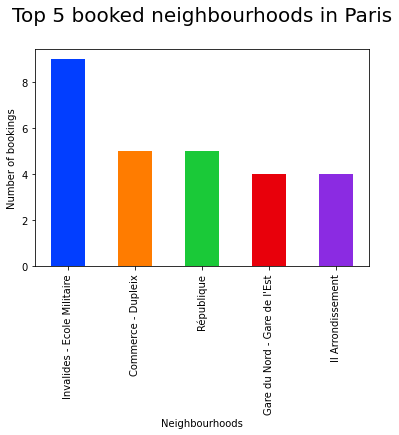

In [23]:
# Plot the top 10 most booked neighbourhoods in Paris 
palette_color = sns.color_palette("bright")
plt.title('Top 5 booked neighbourhoods in Paris',fontsize=20,y=1.1);
plt.xlabel('Neighbourhoods')
plt.ylabel('Number of bookings')
top_5.plot(kind='bar', color=palette_color);


### Conclusion


We can see that **Invalides - Ecole Militaire** with **9** bookings, **Commerce-Dupleix** with 5 bookings and **La République** with also 5 bookings are the most booked neighbourhoods in Paris between **2022-06-06** and **2022-06-07**.
